# Reduksi Dimensi dengan metode PCA

'data.frame':	900 obs. of  6 variables:
 $ contractcode: chr  "AGR-000001" "AGR-000011" "AGR-000030" "AGR-000043" ...
 $ income      : num  295 271 159 210 165 220 70 88 163 100 ...
 $ tenor       : num  48 36 12 12 36 24 36 48 48 36 ...
 $ dependents  : num  5 5 0 3 0 5 3 3 5 6 ...
 $ midoverdue  : num  75.5 75.5 0 53 38 15 38 38 38 38 ...
 $ riskrating  : num  4 4 1 3 2 1 2 2 2 2 ...


,contractcode,income,tenor,dependents,midoverdue,riskrating
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,AGR-000001,295,48,5,75.5,4
2,AGR-000011,271,36,5,75.5,4
3,AGR-000030,159,12,0,0.0,1
4,AGR-000043,210,12,3,53.0,3
5,AGR-000049,165,36,0,38.0,2
6,AGR-000063,220,24,5,15.0,1


 contractcode           income          tenor         dependents   
 Length:900         Min.   : 70.0   Min.   :12.00   Min.   :0.000  
 Class :character   1st Qu.:121.0   1st Qu.:12.00   1st Qu.:1.000  
 Mode  :character   Median :162.0   Median :24.00   Median :3.000  
                    Mean   :163.3   Mean   :29.93   Mean   :2.932  
                    3rd Qu.:199.0   3rd Qu.:48.00   3rd Qu.:5.000  
                    Max.   :300.0   Max.   :48.00   Max.   :6.000  
   midoverdue     riskrating   
 Min.   : 0.0   Min.   :1.000  
 1st Qu.:15.0   1st Qu.:1.000  
 Median :53.0   Median :3.000  
 Mean   :48.1   Mean   :2.681  
 3rd Qu.:53.0   3rd Qu.:3.000  
 Max.   :91.0   Max.   :5.000  

,income,tenor,dependents,midoverdue
income,1.00000000,-0.07256604,0.2427909,0.1250535
tenor,-0.07256604,1.00000000,0.0334339,0.2333681
dependents,0.24279088,0.03343390,1.0000000,0.7632659
midoverdue,0.12505348,0.23336810,0.7632659,1.0000000


Standard deviations (1, .., p=4):
[1] 1.3685609 1.0492944 0.9059637 0.4530475

Rotation (n x k) = (4 x 4):
                  PC1        PC2        PC3         PC4
income     -0.2665678  0.6235436 -0.7299486  0.08549929
tenor      -0.1827165 -0.7592266 -0.6015443 -0.16832731
dependents -0.6675878  0.1100498  0.2569754 -0.69005738
midoverdue -0.6707330 -0.1505238  0.1981998  0.69869635

Importance of components:
                          PC1    PC2    PC3     PC4
Standard deviation     1.3686 1.0493 0.9060 0.45305
Proportion of Variance 0.4682 0.2752 0.2052 0.05131
Cumulative Proportion  0.4682 0.7435 0.9487 1.00000

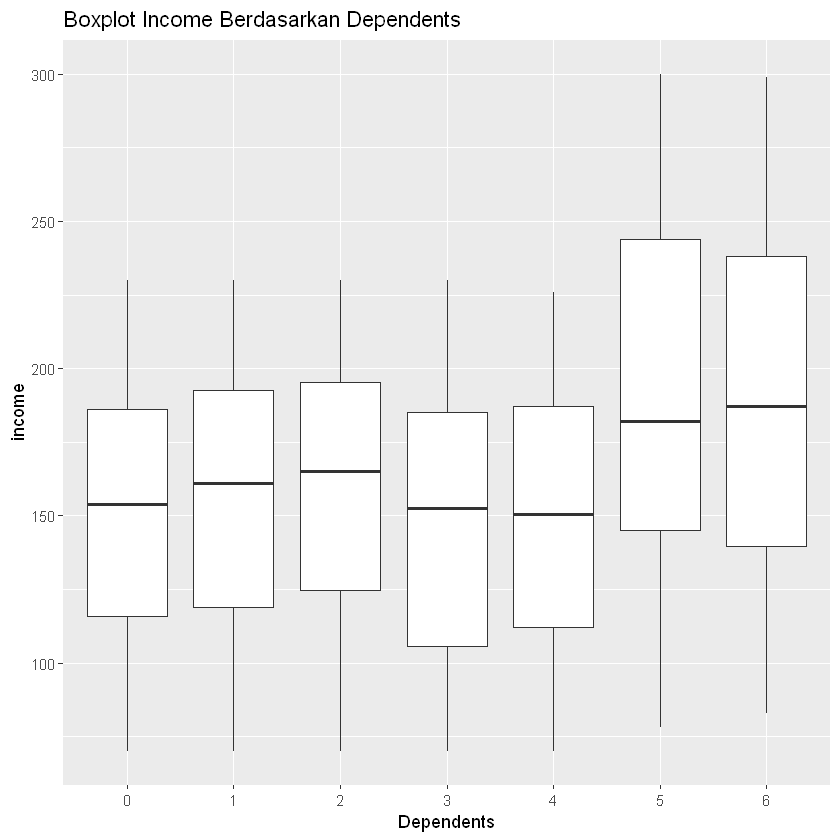

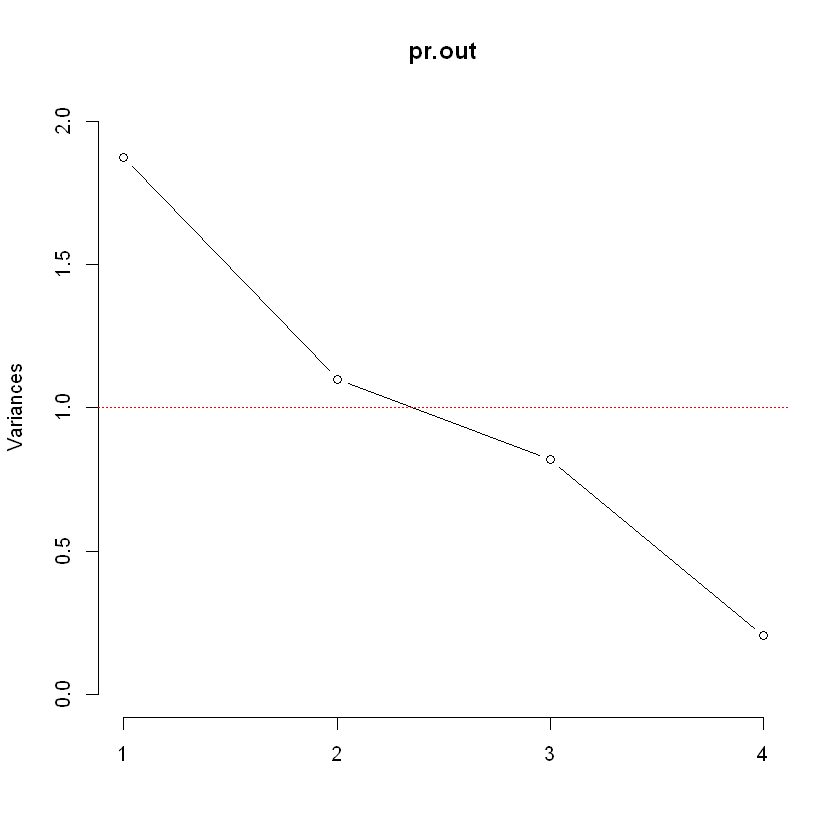

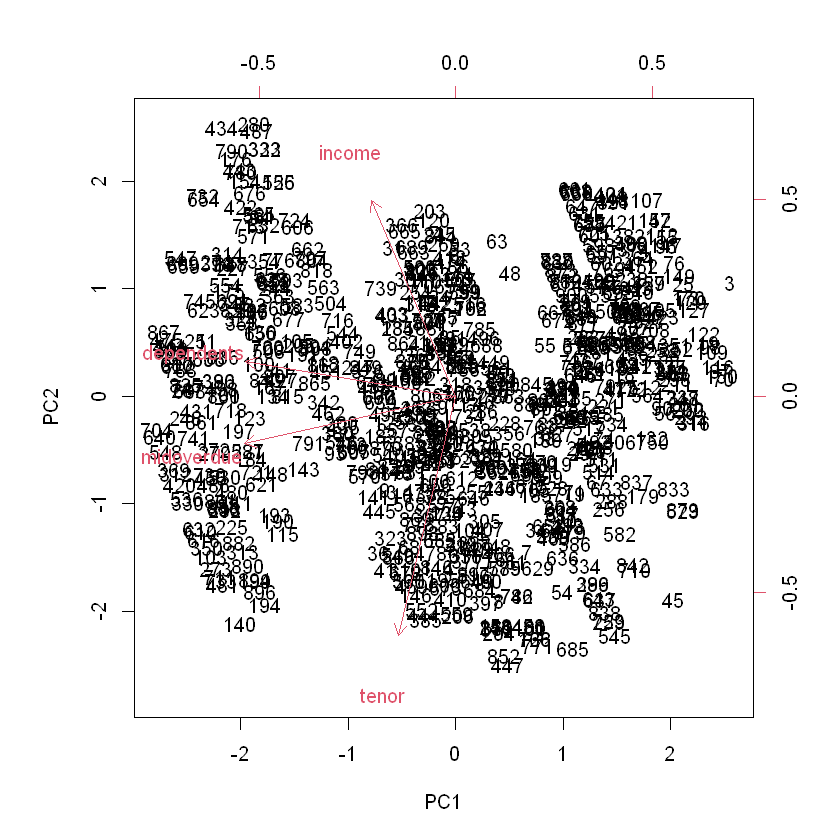

In [1]:
#Panggil library openxlsx untuk membaca file data Excel
#[1]
library(openxlsx)

#Baca data pada sheet "csdata" dalam file "https://storage.googleapis.com/dqlab-dataset/dqlab_pcadata.xlsx"
#dan simpan data dengan nama "csdat_raw"
#[2]
csdat_raw <- read.xlsx("https://storage.googleapis.com/dqlab-dataset/dqlab_pcadata.xlsx", sheet = "csdata")

#Tampilkan struktur data 
#[3]
str(csdat_raw)

#Tampilkan beberapa baris observasi dengan fungsi head()
#[4A]
head(csdat_raw)

#Tampilkan statistika deskriptif untuk semua variabel dalam data.
#[4B]
summary(csdat_raw)

#Gambarkan distribusi Income berdasarkan Dependents
library(ggplot2)
ggplot(csdat_raw, aes(as.factor(dependents), income)) + 
   geom_boxplot() + xlab("Dependents") + ggtitle("Boxplot Income Berdasarkan Dependents")

#Pisahkan data untuk traning set dan testing set 
#untuk tiap-tiap risk rating
#[5]

#Catat indeks/ nomor baris untuk tiap-tiap risk rating
index1 <- which(csdat_raw$riskrating == 1)
index2 <- which(csdat_raw$riskrating == 2)

#Lakukan pencatatan indeks untuk risk rating berikutnya
#[6]
index3 <- which(csdat_raw$riskrating == 3)
index4 <- which(csdat_raw$riskrating == 4)
index5 <- which(csdat_raw$riskrating == 5)

#80% data akan digunakan sebagai traning set.
#Ulangi langkah sampai dengan index5
#[7]
ntrain1 <- round(0.8 * length(index1))
ntrain2 <- round(0.8 * length(index2))
ntrain3 <- round(0.8 * length(index3))
ntrain4 <- round(0.8 * length(index4))
ntrain5 <- round(0.8 * length(index5))

#set seed agar sampling ini bisa direproduksi
set.seed(100)

#sampling data masing-masing rating untuk training set
#Ulangi langkah sampai dengan train5_index
#[8]
train1_index <- sample(index1, ntrain1)
train2_index <- sample(index2, ntrain2)
train3_index <- sample(index3, ntrain3)
train4_index <- sample(index4, ntrain4)
train5_index <- sample(index5, ntrain5)

#menyimpan data ke dalam testing set
#Ulangi langkah sampai dengan test5_index
#[9]
test1_index <- setdiff(index1, train1_index)
test2_index <- setdiff(index2, train2_index)
test3_index <- setdiff(index3, train3_index)
test4_index <- setdiff(index4, train4_index)
test5_index <- setdiff(index5, train5_index)

#Menggabungkan hasil sampling masing-masing risk rating ke dalam training set
csdattrain <- do.call("rbind", list(csdat_raw[train1_index,],
   csdat_raw[train2_index,], csdat_raw[train3_index,],
   csdat_raw[train4_index,], csdat_raw[train5_index,]))
cstrain <- subset(csdattrain, select =
   -c(contractcode,riskrating))

#Menggabungkan hasil sampling masing-masing risk rating ke dalam testing set
csdattest <- do.call("rbind", list(csdat_raw[test1_index,],
   csdat_raw[test2_index,], csdat_raw[test3_index,],
   csdat_raw[test4_index,], csdat_raw[test5_index,])) #[10]
cstest <- subset(csdattest, 
   select = -c(contractcode,riskrating)) #[11]

#Menghitung korelasi antar variabel 
cor(cstrain)

#Lakukan analisa PCA dengan fungsi prcomp() dan
#simpan output ke dalam obyek dengan nama pr.out
#[12]
pr.out <- prcomp(cstrain, scale = TRUE, center = TRUE)

#Tampilkan output PCA dengan memanggil obyek pr.out
#[13]
pr.out

#Tampilkan summary dari output PCA
#[14]
summary(pr.out)

#Gambarkan scree plot dengan menggunakan fungsi screeplot()
#[15]
screeplot(pr.out, type = "line", ylim = c(0,2))

#Tambahkan garis horizontal sebagai panduan untuk menggunakan kriteria Kaiser
abline(h = 1, lty = 3, col = "red")

#Gambarkan biplot dengan menggunakan fungsi biplot()
#[16]
biplot(pr.out, scale = 0) #draw first 2 principal components